In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the csv file
df=pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


- **id**: Unique ID for the customer  
- **Gender**: Gender of the customer  
- **Age**: Age of the customer  
- **Driving_License**:  
  - `0`: Customer does not have a Driving License  
  - `1`: Customer already has a Driving License  
- **Region_Code**: Unique code for the region of the customer  
- **Previously_Insured**:  
  - `1`: Customer already has Vehicle Insurance  
  - `0`: Customer doesn't have Vehicle Insurance  
- **Vehicle_Age**: Age of the Vehicle  
- **Vehicle_Damage**:  
  - `1`: Customer got their vehicle damaged in the past  
  - `0`: Customer didn’t get their vehicle damaged in the past  
- **Annual_Premium**: Amount customer needs to pay as premium for the year  
- **Policy_Sales_Channel**: Anonymized code for the channel used to reach the customer (e.g., Different Agents, Over Mail, Over Phone, In Person, etc.)  
- **Vintage**: Number of days the customer has been associated with the company  
- **Response**:  
  - `1`: Customer is interested  
  - `0`: Customer is not interested  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
value_counts=df['Response'].value_counts()#data is highy imbalanced

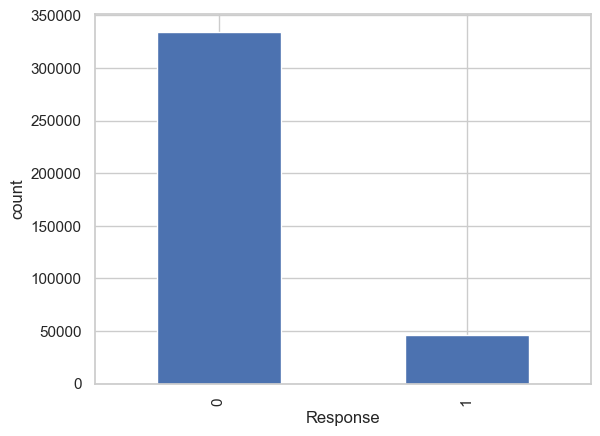

In [6]:
plt.Figure(figsize=(2,2))
value_counts.plot(kind='bar')
plt.ylabel('count');

<Axes: >

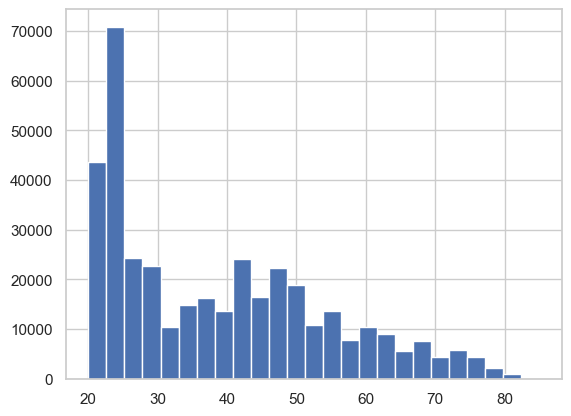

In [7]:
df['Age'].hist(bins=25)

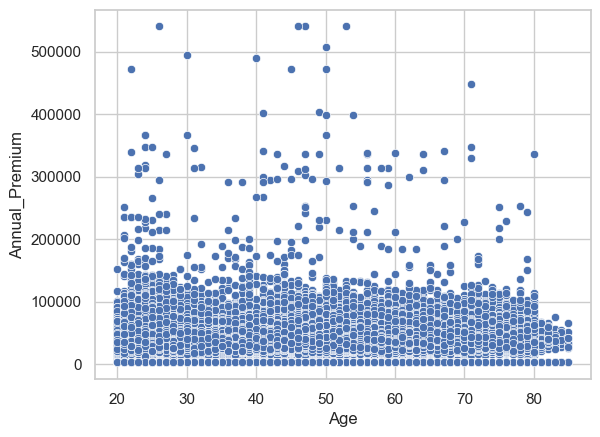

In [8]:
#scatter plot
plt.Figure(figsize=(6,4))
sns.scatterplot(x='Age',y="Annual_Premium",data=df);

In [9]:
genders=df['Gender'].value_counts()

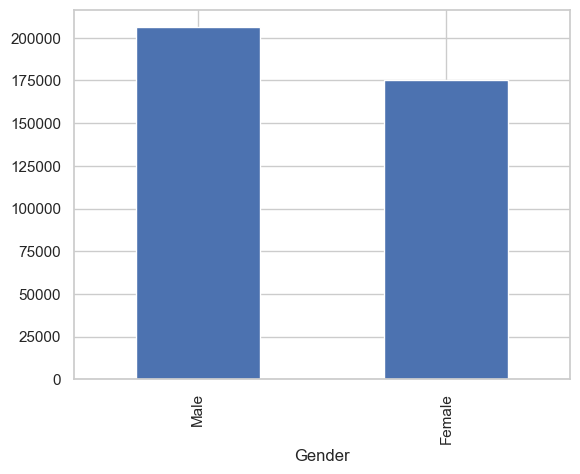

In [10]:
genders.plot(kind='bar');

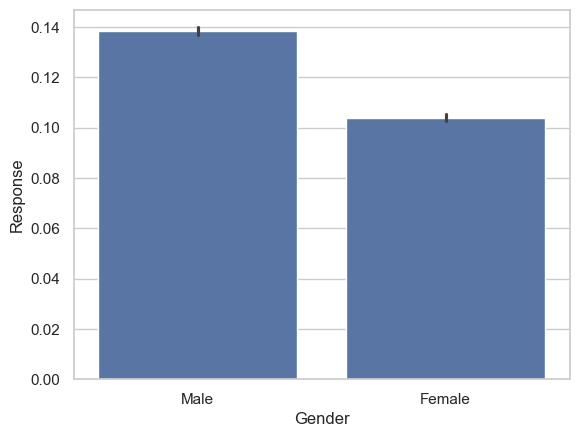

In [11]:
plt.Figure(figsize=(6,4))
sns.barplot(x='Gender',y="Response",data=df);

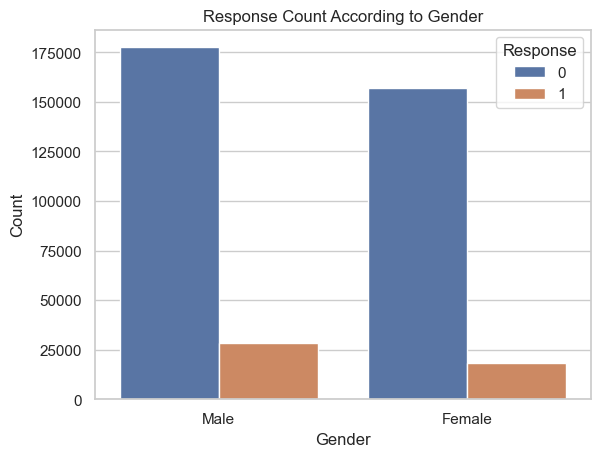

In [12]:
sns.countplot(data=df, x="Gender", hue="Response")

# Title aur labels add 
plt.title("Response Count According to Gender")
plt.xlabel("Gender")
plt.ylabel("Count");


<Axes: xlabel='Driving_License', ylabel='count'>

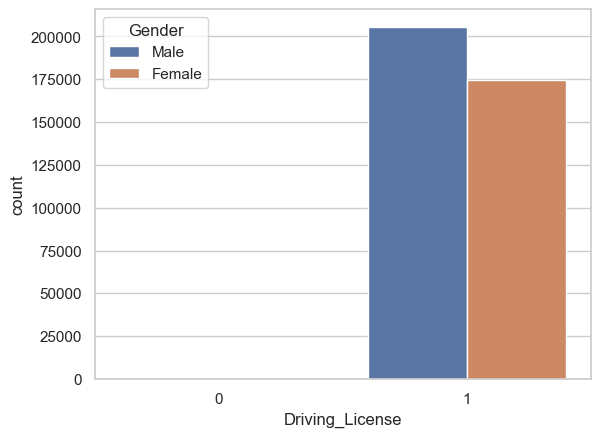

In [13]:
sns.countplot(data=df,x='Driving_License',hue='Gender')

In [14]:
df.shape

(381109, 12)

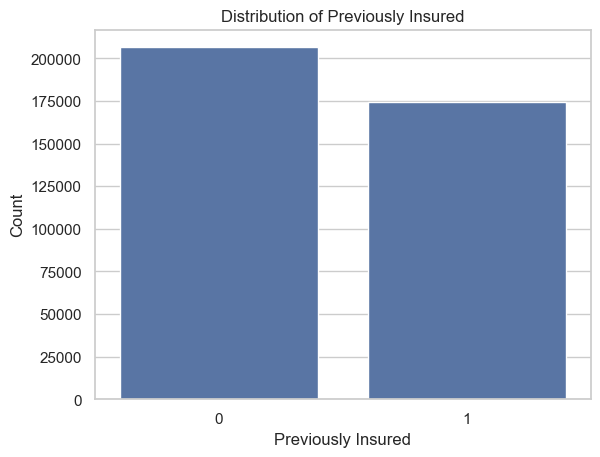

In [15]:
sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

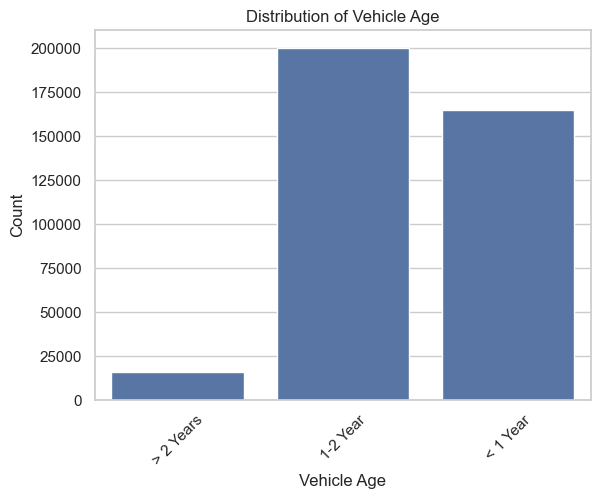

In [16]:
sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

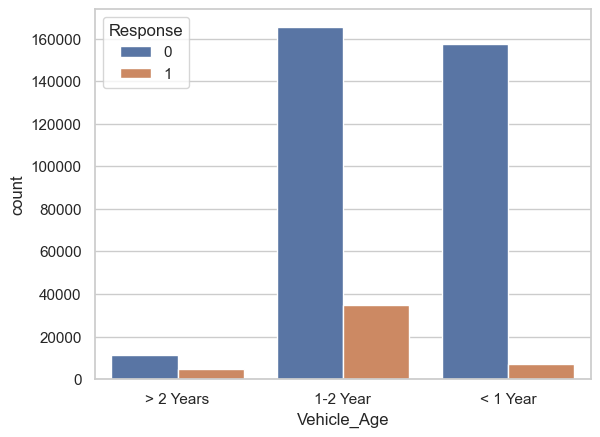

In [17]:
sns.countplot(data=df,x='Vehicle_Age',hue='Response');

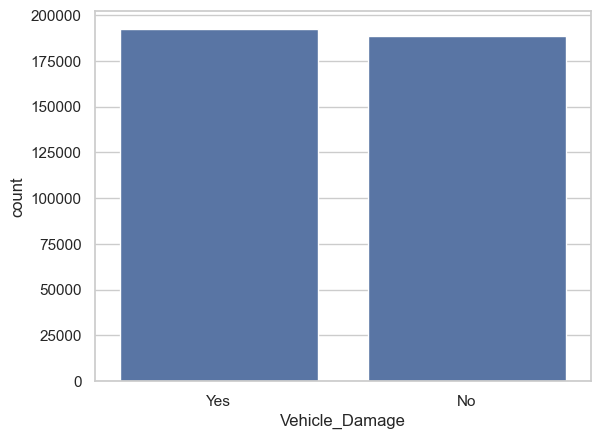

In [18]:
sns.countplot(data=df, x='Vehicle_Damage');

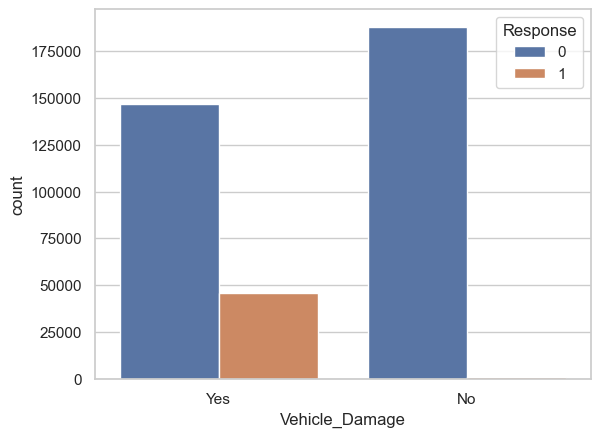

In [19]:
sns.countplot(data=df, x='Vehicle_Damage',hue="Response");

(0.0, 500000.0)

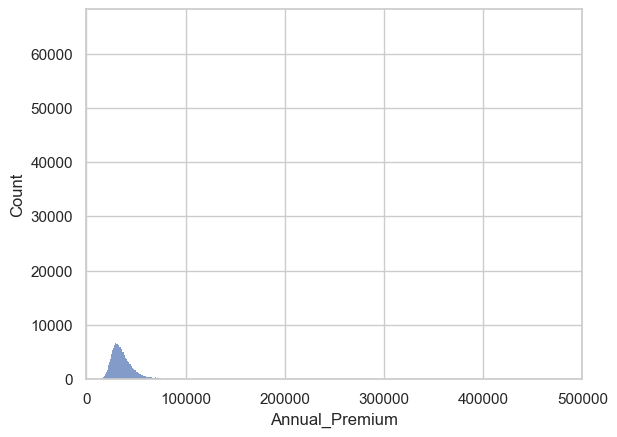

In [20]:
sns.histplot(df['Annual_Premium'])
plt.xlim(0, 500000)  # 0 se 1 lakh tak zoom


In [21]:

df[df['Annual_Premium']>400000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
54743,54744,Male,26,1,28.0,0,< 1 Year,Yes,540165.0,156.0,245,1
121687,121688,Male,71,1,28.0,0,> 2 Years,Yes,448156.0,122.0,135,0
136304,136305,Male,50,1,28.0,0,1-2 Year,Yes,472042.0,124.0,14,1
144282,144283,Female,53,1,28.0,1,1-2 Year,No,540165.0,26.0,134,0
172257,172258,Male,40,1,28.0,0,1-2 Year,Yes,489663.0,122.0,297,1
190154,190155,Male,47,1,28.0,0,1-2 Year,Yes,540165.0,42.0,24,0
242469,242470,Female,49,1,28.0,0,1-2 Year,Yes,402863.0,122.0,218,0
268332,268333,Male,46,1,28.0,0,1-2 Year,Yes,540165.0,124.0,59,0
275442,275443,Male,22,1,28.0,0,1-2 Year,Yes,472042.0,163.0,114,0


<Axes: xlabel='Annual_Premium', ylabel='Count'>

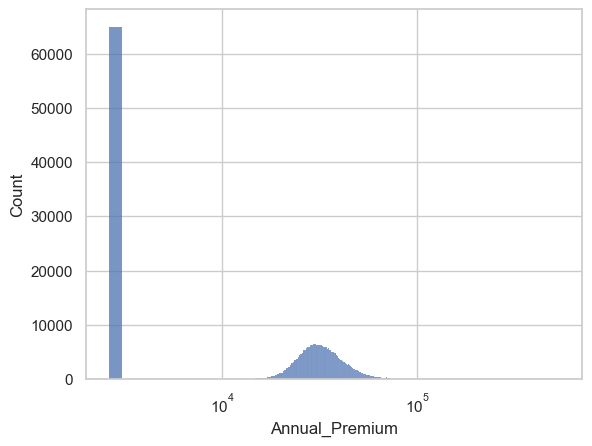

In [22]:
# Log scale
sns.histplot(df['Annual_Premium'])
plt.xscale('log')

# Zoom for big values
sns.histplot(df[df['Annual_Premium'] > 100000]['Annual_Premium'])


In [23]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

# data preprocessing


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [25]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [26]:
# Target
y = df['Response'].astype(int)
df = df.drop(columns=['Response', 'id'])


# 1) Mapping for Binary columns

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
df['Driving_License'] = df['Driving_License'].astype(int)
df['Previously_Insured'] = df['Previously_Insured'].astype(int)


# 2) Dummies for specific columns

dummies = pd.get_dummies(df[['Vehicle_Age', 'Vehicle_Damage']], drop_first=True)
df = pd.concat([df.drop(columns=['Vehicle_Age', 'Vehicle_Damage']), dummies], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Vehicle_Age_< 1 Year   381109 non-null  bool   
 9   Vehicle_Age_> 2 Years  381109 non-null  bool   
 10  Vehicle_Damage_Yes     381109 non-null  bool   
dtypes: bool(3), float64(3), int64(5)
memory usage: 24.4 MB


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42, stratify=y
)


# 4) Preprocessing setup

num_std = ['Age', 'Vintage']                 # Normal numeric features
num_robust = ['Annual_Premium']              # Outliers handled by RobustScaler
bin_pass = ['Gender', 'Driving_License', 'Previously_Insured',
            'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes']
high_cat = ['Region_Code', 'Policy_Sales_Channel']  # High cardinality categorical

pre = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), num_std),
        ('rb', RobustScaler(), num_robust),
        ('oh', OneHotEncoder(handle_unknown='ignore', sparse_output=False), high_cat),
        ('bin', 'passthrough', bin_pass),
    ],
    remainder='drop'
)


After SMOTE: [267519 267519]
Accuracy: 0.7468709821311432
F1 Score: 0.4437525226316093
Precision: 0.3036616161616162
Recall: 0.8238064654249625
ROC-AUC: 0.8425416725246072


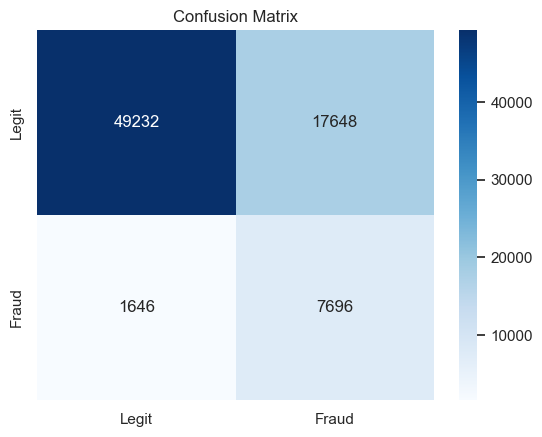

NameError: name 'X' is not defined

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 5. Apply SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", np.bincount(y_train_res.astype(int)))

# 6. Train RandomForest Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_res, y_train_res)

# 7. Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# 8. Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# 9. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

